### Кластеризация

Автор - Т. Вильданов

#### Цель работы

Применить методы машинного обучения для решения задач кластеризации

#### Задания для выполнения

1. Загрузите прилагающийся датасет.
2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.
3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score. 
4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.
5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.
6. Построить графическую интерпретацию из пункта 3,  с центрами кластеров. 
7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.
8. Оцените модель с помощью метрик.
9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

#### Методические указания

Для начала работы нам потребуется импортировать необходимые библиотеки:

```py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
%matplotlib inline
```

В первую очередь загрузим датасет, выведем первые несколько строк:

```py
df = pd.read_csv('.../Mall_Customers.csv')
df.head()
```

Построим графическую интерпретацию значений датасета. В качестве x-координаты возьмем годовой доход, а в качестве y-координаты оценку трат. 

```py
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Genre')
```

По графику можно предположить оптимальное количество кластеров для хорошего описания массива. 

Проверим наши предположения с помощью перебора количества кластеров. Для этого построим на графике взаимосвязь суммы квадратов расстояний значений датасета до центра кластера от количества кластеров.

```py
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(x)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
```

В качестве количества кластеров возьмем число 5. Создадим модель К-средних и обучим её.

Построим графическую интерпретацию данных с центрами кластеров.

```py
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);
```


#### Задания для выполнения



In [2]:
import pandas as pd
import numpy as np

1. Загрузите прилагающийся датасет.


In [3]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.


In [7]:
mall.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Пропущенных значений нет

3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score. 


X годовой доход, Y оценка трат

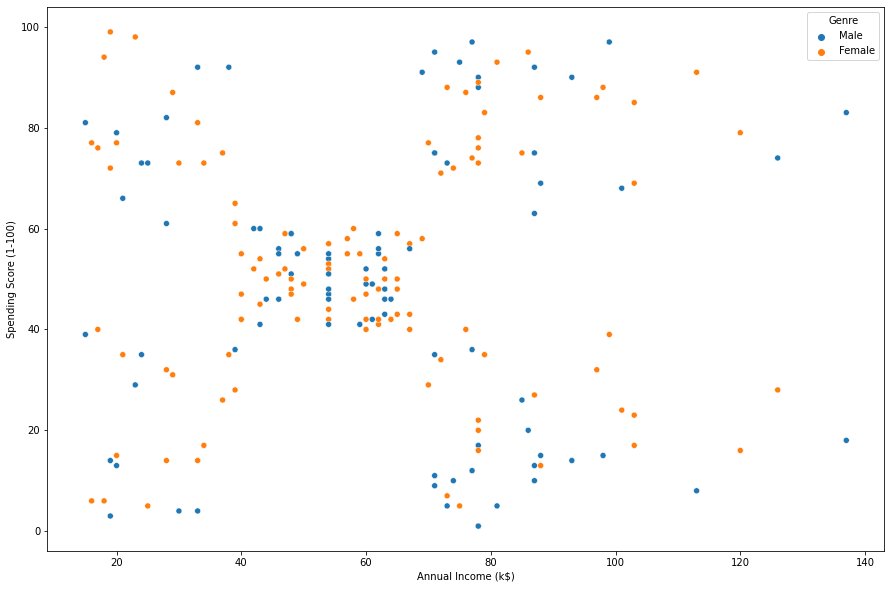

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall, hue='Genre');

4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.


In [21]:
norm = mall.iloc[:,1:]
norm = norm.replace({'Genre':{'Male':1, 'Female':2}})
norm

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
195,2,35,120,79
196,2,45,126,28
197,1,32,126,74
198,1,32,137,18


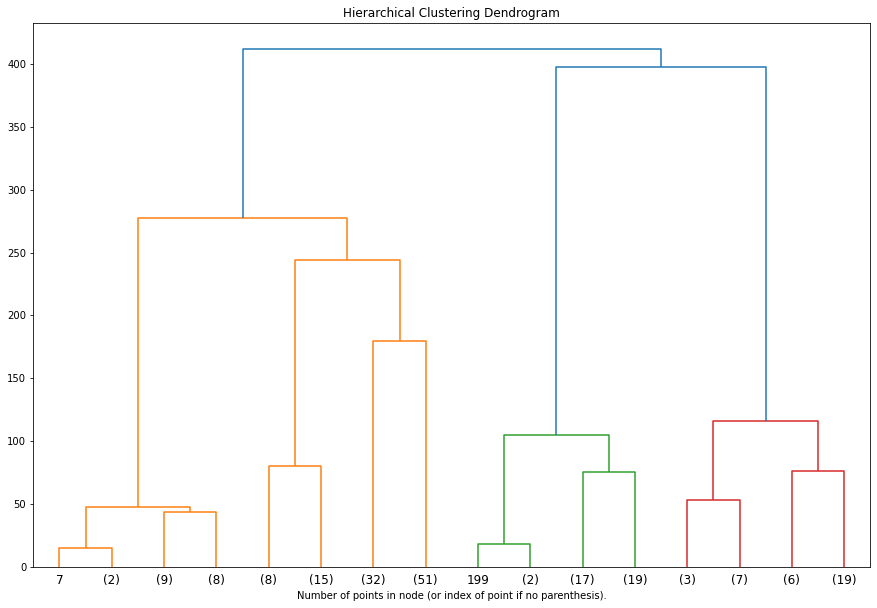

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = norm

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [28]:
import warnings

# убирает ошибки об утечке памяти
warnings.filterwarnings('ignore')

In [29]:
# Within Cluster Sum of Squares (внутрикластровая сумма квадратов, считает квадрат расстояния между точками)

wcss = [] 
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(norm) 
    wcss.append(kmeans.inertia_)
wcss

[308862.06,
 212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75427.71182424155,
 58348.64136331505,
 51575.27793107793,
 44359.63464114833,
 40942.511170061174,
 37515.84125504126]

Text(0, 0.5, 'Сумма квадратов расстояний значений датасета до центра кластера')

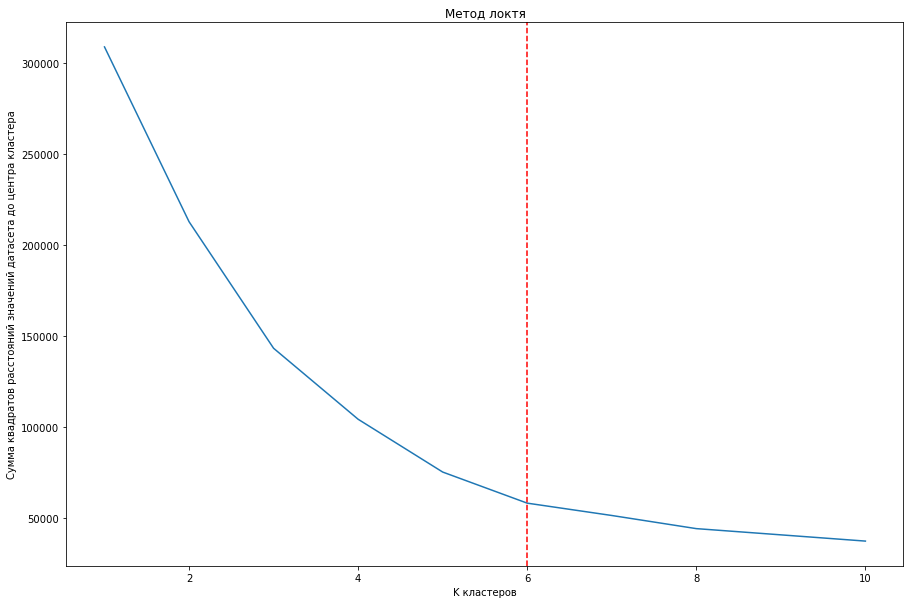

In [33]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(15,10))
plt.plot(ks, wcss);
plt.axvline(6, linestyle='--', color='r')
plt.title('Метод локтя')
plt.xlabel('K кластеров')
plt.ylabel('Сумма квадратов расстояний значений датасета до центра кластера')

5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.


In [44]:
from sklearn import preprocessing

# Масштабирование
norm = preprocessing.normalize(norm)

In [45]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(norm)
 
print(label)

[4 4 2 4 4 4 2 4 2 4 2 4 2 4 2 4 3 4 2 4 3 4 2 4 2 4 3 4 3 4 2 4 2 4 2 4 2
 4 3 4 2 4 3 5 3 5 3 5 5 3 3 5 5 3 3 3 3 3 5 3 3 5 3 3 3 5 3 3 5 5 3 3 3 3
 3 5 3 3 5 3 3 5 3 3 5 3 3 5 5 3 3 1 3 3 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 5 0 5 0 5 0 5 0 5 1 5 0 5 0 5 0 5 0 5 1 5 0 5 0 5
 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 1 0 5 0 1 0 1 0 5 0 5 0 1 0 5 0 1 0 1 0
 5 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


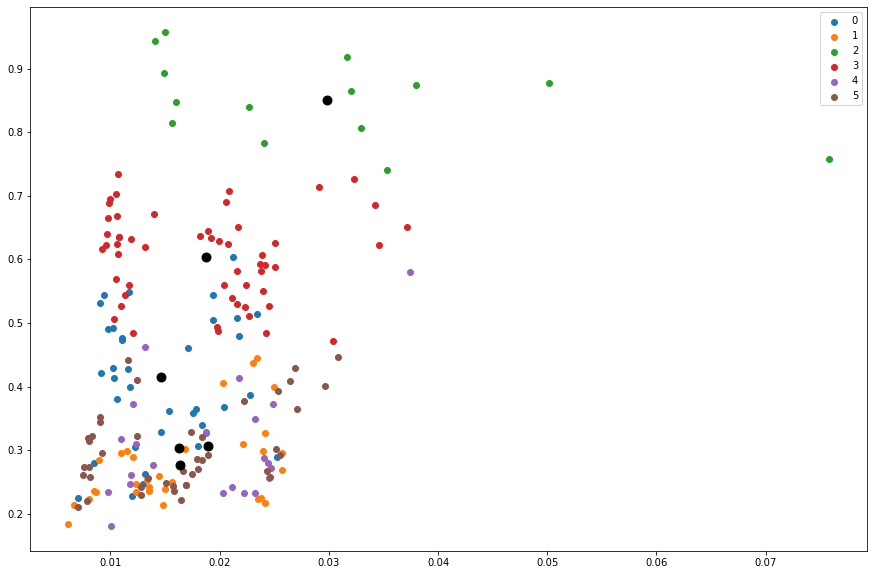

In [48]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(15,10))
for i in u_labels:
    plt.scatter(norm[label == i , 0] , norm[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

6. Построить графическую интерпретацию из пункта 3,  с центрами кластеров. 


In [50]:
norm.shape

(200, 4)

In [53]:
# Возвращаем назнвание признаков в нормализованные данные
new_norm = pd.DataFrame(norm, columns = ["Genre", "Age", "Income", "Score"])
new_norm

,Genre,Age,Income,Score
0,0.021780,0.413826,0.326705,0.849433
1,0.011762,0.247008,0.176434,0.952743
2,0.075810,0.758098,0.606478,0.227429
3,0.024401,0.280613,0.195209,0.939444
4,0.037437,0.580276,0.318216,0.748743
...,...,...,...,...
195,0.013524,0.236670,0.811441,0.534199
196,0.014630,0.329169,0.921674,0.204817
197,0.006685,0.213919,0.842305,0.494687
198,0.007050,0.225610,0.965891,0.126905


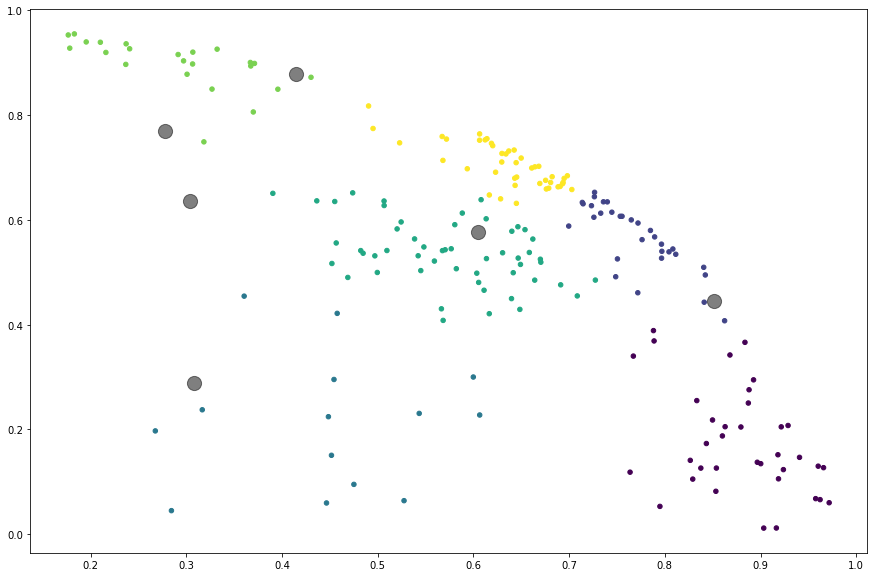

In [54]:
plt.figure(figsize=(15,10));
plt.scatter(new_norm.Income, new_norm.Score, c=label, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.


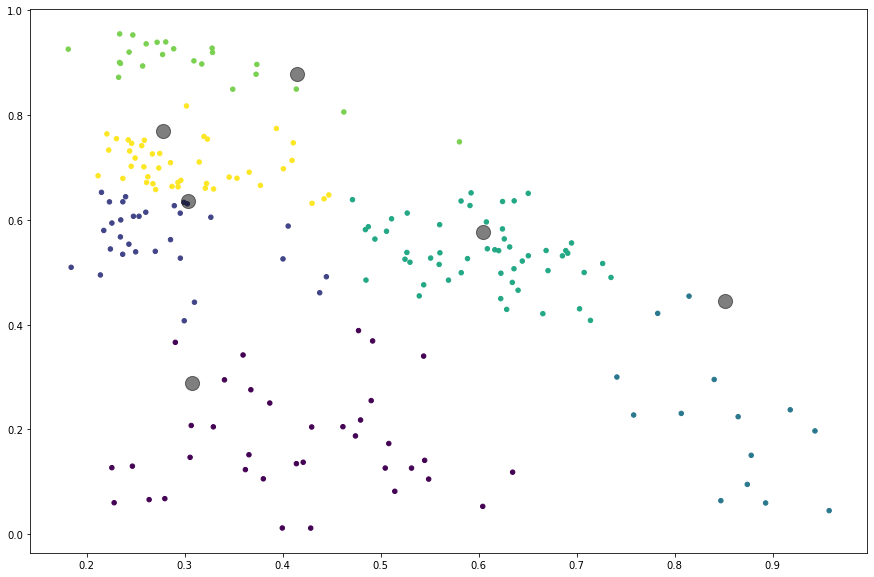

In [68]:
plt.figure(figsize=(15,10));
plt.scatter(new_norm.Age, new_norm.Score, c=label, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

8. Оцените модель с помощью метрик.


##### silhouette_score
Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера ( a) и среднего расстояния до ближайшего кластера ( b) для каждой выборки. Эта функция возвращает средний коэффициент силуэта по всем образцам.

Лучшее значение равно 1, а худшее значение равно -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру, так как другой кластер более похож.

##### calinski_harabasz_score
Если основные метки истинности неизвестны, для оценки модели можно использовать индекс Калински-Харабаса ( sklearn.metrics.calinski_harabasz_score), также известный как критерий отношения дисперсии, где более высокий показатель Калински-Харабаса относится к модели с более четко определенными кластерами.

Индекс представляет собой отношение суммы дисперсии между кластерами и внутрикластерной дисперсии для всех кластеров (где дисперсия определяется как сумма квадратов расстояний):

In [55]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print("silhouette_score:", silhouette_score(norm,  label))
print("calinski_harabasz_score:", calinski_harabasz_score(norm,  label))

silhouette_score: 0.48035275418088885
calinski_harabasz_score: 280.37368054800015


9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [57]:
n_clusters = list(range(2,30))
silhouette = []
calinski_harabasz = []

for clstrs in n_clusters:    
    kmeansx = KMeans(n_clusters=clstrs)
    label_x = kmeansx.fit_predict(norm)

    silhouette.append(silhouette_score(norm, label_x))
    calinski_harabasz.append(calinski_harabasz_score(norm, label_x))

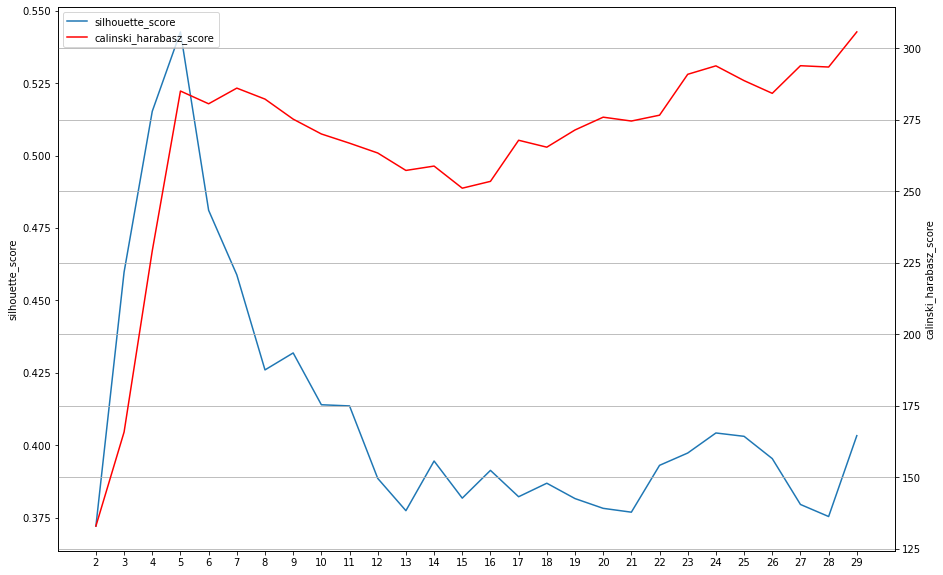

In [67]:
fig = plt.figure(figsize=(15, 10))
plot1, = plt.plot(n_clusters, silhouette, label='silhouette_score')
plt.ylabel('silhouette_score')
plt.twinx()
plot2, = plt.plot(n_clusters, calinski_harabasz, label='calinski_harabasz_score', color="red")
plt.ylabel('calinski_harabasz_score')
plt.legend(handles=[plot1, plot2])
plt.xlabel('Количество кластеров')
plt.xticks(n_clusters)
plt.grid()

Как видно из графиков - оптимальное количество кластеров 5